## Phase 2

### Header
#### Course Name: CSE 487/587 Data Intensive 
#### phase #: 2
#### term project name: predicting gentrification 

### Q Write down the following information: 
#### 1. Problem Statement: 

Have you ever wondered why there are so many cultural enclaves or demographic shifts in New York city? In this research we are going to find a relation of how financial power or housing price can affect the migration of minorities or low wage class. We hope to prove that the change in housing and income will also affect the residency locations of New Yorkers, meanwhile finding a model or using pattern recognition that can further predict areas with a high risk of becoming gentrified and the migration of population in the already gentrified locations.


#### 2. Hypothesis:
   + hypothesis 1:  As the rent and home values rise for a puma in New York city, potentially this would cause the decrease of n - 2 race category percentage in that puma, assuming n is the total number of race categories. This would cause a leak in diversity in certain pumas where a single or dual race caterology begins to dominate, we define this as gentraication in this project. We predict that the puma with the highest risk of gentrifying are the pumas that have a history of increasing home value and percentage of rent to income, as well as an increase in only white racial percentage.
   + hypothesis 2: demographic variables often have spatial dependencies. We believe that using space and time as a feature can help increase predictability power 
   + hypothesis 3: white race are gentrifiers, and BIPOC race are more susceptible to be displaced from gentrification 

# Library versions we used 

In [2]:
import pysal 
import esda
import splot 
import contextily 
import matplotlib
import pca 
import plotly 
import seaborn 
import geopandas 
print("pysal version: " + pysal.__version__)
print("esda version: "  + esda.__version__)
print("splot version: "+ splot.__version__)
print("contextily version: " + contextily.__version__)
print("matplotlib version: " + matplotlib.__version__)
print("pca version: " + pca.__version__)
print("seaborn version: " + seaborn.__version__)
print("geopandas version: " + geopandas.__version__)

C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"


pysal version: 2.1.0
esda version: 2.3.6
splot version: 1.1.3
contextily version: 1.0.0
matplotlib version: 3.3.2
pca version: 1.3.0
seaborn version: 0.11.0
geopandas version: 0.8.1


In [5]:
# please install the following libraries with the right versions, or else our code will not work 
#!pip install pysal==2.1.0
#!pip install esda==2.3.6
# !pip install geopandas==0.8.1

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [1]:
# import your cleaned dataset
import pandas as pd 
df= pd.read_csv('data_imputated.csv')
df.head()
# display the first five rows data.head(5)

puma  year         mergeid  estimate_black_females  estimate_total_pop  \
0  3603701  2011  3603701 _ 2011                    8349              106558   
1  3603702  2011  3603702 _ 2011                   56929              144403   
2  3603703  2011  3603703 _ 2011                   17630              115784   
3  3603704  2011  3603704 _ 2011                   15386              125976   
4  3603705  2011  3603705 _ 2011                   30973              154386   

   percent_black_only  percent_black_women  quantile_black_women  gini_index  \
0                14.3             7.835170                     3      0.4852   
1                70.4            39.423696                     5      0.4291   
2                27.2            15.226629                     4      0.4293   
3                23.0            12.213437                     3      0.4500   
4                36.4            20.062052                     4      0.4847   

   percent_second_mortgage  ...  disability_status  total_housing_units  \
0                     14.0  ...          14.349000                45433   
1                     14.9  ...          11.125000                51321   
2                     13.6  ...          13.975333                48946   
3                     19.0  ...          13.169000                47577   
4                     12.1  ...          14.863333                55842   

   num_renter_occupied  num_owner_occupied  num_total_occupied  \
0                28757               12714               41471   
1                29678               17780               47458   
2                23433               22537               45970   
3                31071               13398               44469   
4                47237                3850               51087   

   percent_born_us  english_prof  percent_college  percent_uninsured  \
0             62.3          20.3             38.7          11.983000   
1             56.1           7.7             22.1          14.353333   
2             76.3          10.2             24.2           9.534667   
3             58.9          21.2             23.2          13.788667   
4             60.8          28.5              9.7          15.490667   

   percent_unemployed  
0                 6.3  
1                 8.5  
2                 5.5  
3                 6.4  
4                 8.4  

[5 rows x 44 columns]

In [2]:
import geopandas as gpd
import zipfile 
from io import BytesIO
import geopandas as gpd
from urllib.request import urlopen
import json
#Please repeat if it does not work
with urlopen('https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycd_21a.zip') as response:
    file = zipfile.ZipFile(BytesIO(response.read()))
    file.extractall('community_districts_shapefiles/')
gdf = gpd.read_file('community_districts_shapefiles/nycd_21a/nycd.shp')
borough = {'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'}

In [3]:
cds_dict = {
'Bronx' :  {1:3710,
            2:3710,
            3:3705, 
            6:3705, 
            4:3708, 
            5:3707, 
            7:3706, 
            8:3701, 
            9:3709, 
            10:3703, 
            11:3704, 
            12:3702}, 
'Manhattan': {
            1:3810,  
            2:3810, 
            3:3809, 
            4:3807,
            5:3807, 
            6:3808, 
            7:3806, 
            8:3805, 
            9:3802, 
            10:3803, 
            11:3804,
            12:3801},
'Staten Island': {
            1:3903, 
            2:3902, 
            3:3901},
'Brooklyn': {
            1:4001, 
            2:4004, 
            3:4003, 
            4:4002, 
            5:4008, 
            6:4005, 
            7:4012, 
            8:4006, 
            9:4011, 
            10:4013,
            11:4017, 
            12:4014, 
            13:4018, 
            14:4015, 
            15:4016, 
            16:4007,
            17:4010, 
            18:4009},
'Queens':  {  
            1:4101, 
            2:4109, 
            3:4102,
            4:4107, 
            5:4110,
            6:4108,
            7:4103, 
            8:4106, 
            9:4111, 
            10:4113, 
            11:4104,
            12:4112,
            13:4105,
            14:4114}}
borough = {'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'}
gdf['Borough'] = gdf['BoroCD'].astype(str).str[0].map(borough)
gdf['CD'] = gdf['BoroCD'].astype(str).str[1:].astype(int)
import numpy as np 
def apply_cd(x):
    try:
        return cds_dict[x['Borough']][x['CD']]
    except:
        return np.nan
gdf['PUMA'] = gdf.apply(lambda x: apply_cd(x), axis = 1)

#### 4 EDA  
Read the piazza post for reference https://piazza.com/class/kk6xmjqekrl1e9?cid=154

**4.1 Method 1**

#### operation name: geostpatial analyzation of variables
#### Reason for doing this: the reason for doing this is so that we are able to find locations where the values of a specific variable are. Once found, we hope to see clustering that may help us pic spatial lag features
#### Outcome: We see that clustering does exist. As such, we will go ahead and conduct Moran Statistics so that we may be able to have statistical significance of which variables have spatial dependencies. 

In [6]:
# code for operation
import geopandas as gpd

import matplotlib.pyplot as plt 
import contextily as ctx
imputated_df = df.copy()
dict_geoms = gdf.set_index('PUMA')['geometry'].to_dict()
imputated_df['puma_id'] = imputated_df['puma'].astype(str).str[3:]

imputated_df['geometry'] = imputated_df['puma_id'].astype(float).apply(lambda x :dict_geoms[x])

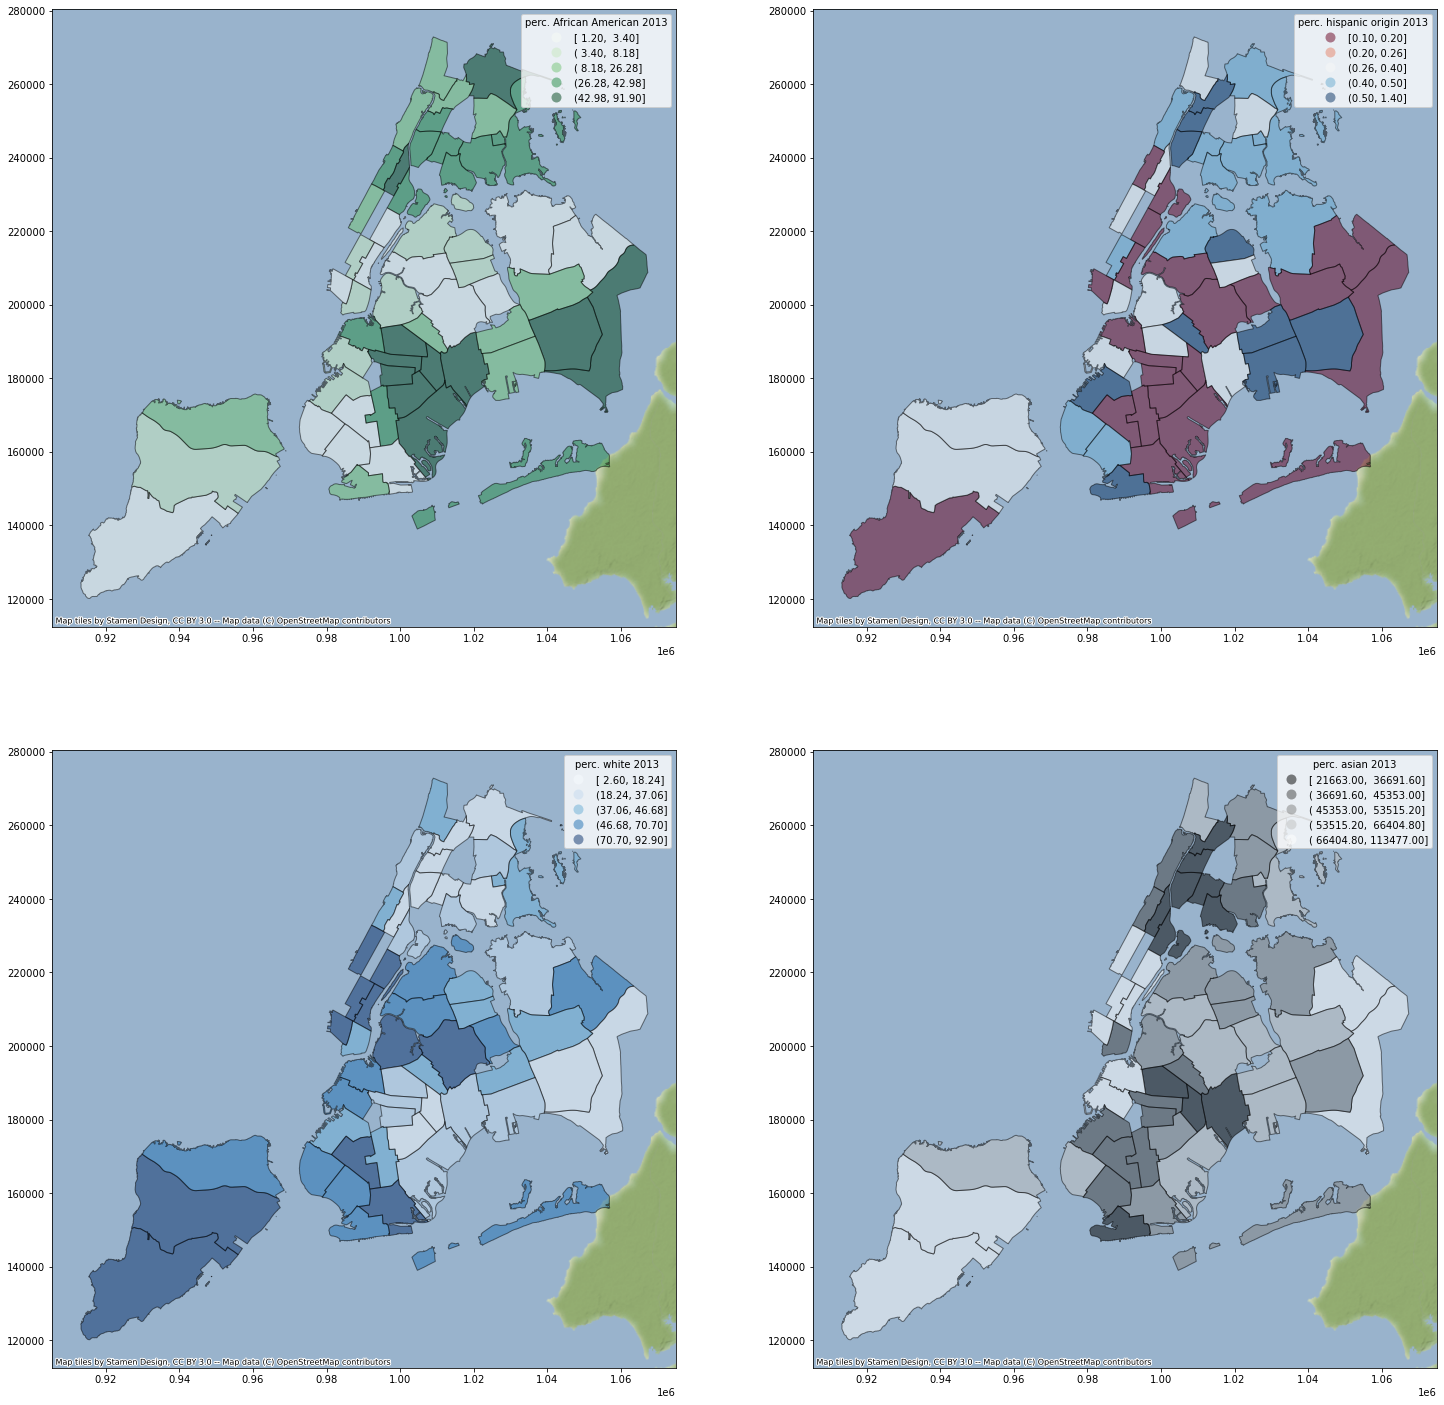

In [7]:
# code for display
import matplotlib.pyplot as plt
gdf_DI = gpd.GeoDataFrame(imputated_df, geometry = 'geometry')
yr_gdf = gdf_DI[gdf_DI['year'] == 2013].copy()


fig, axs = plt.subplots(2, 2,figsize=(25,25))
yr_gdf.plot(column = 'percent_black_only',ax = axs[0,0] ,alpha=0.5, edgecolor='k',cmap='Greens', scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. African American 2013'}) # red is increase tax
yr_gdf.plot(column = 'percent_american_indian',ax = axs[0,1] , alpha=0.5, edgecolor='k',cmap= 'RdBu',scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. hispanic origin 2013'}) # 10 decrease in african american  
yr_gdf.plot(column = 'percent_white_only',ax = axs[1,0] ,alpha=0.5, edgecolor='k',cmap='Blues', scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. white 2013'}) # red is increase tax
yr_gdf.plot(column = 'median_income',ax = axs[1,1] , alpha=0.5, edgecolor='k',cmap= 'gray',scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. asian 2013'}) # 10 decrease in african american 
ctx.add_basemap(axs[0,0])
ctx.add_basemap(axs[0,1])
ctx.add_basemap(axs[1,0])
ctx.add_basemap(axs[1,1])

**4.2 Method 2**

#### operation name: Moran Statistic to find significance of spatial dependency in correlation with time and space.
#### Reason for doing this: we have the following hypothesis tests for moran statistics, 

    null hypothesis: H0 = the test is that the data is randomly distributed
    alternative hypothesis: HA = the data is more spatially clustered than you would expect by chance alone.

#### Outcome: that means we can use spatial lag as a new feature from which we can train the data on!  this means we are able to use spatial models that takes account spatial features. Furthermore, from the Moran Statistics, we will add 0 weights on variables that seem to not reject the null hypothesis. We lack evidence to conclude that the variables rejected by Moran Statistics has any spatial dependence. 

# note.. the model by pysal spatial regression automatically extracts these features, and that we just have to add weights if we want to. As such, the group disregards manually extracting features. 

In [8]:
# code for operation
# MORAN STATISTIC 
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
import pysal as ps 

dropping_duplicates = imputated_df.drop_duplicates('puma_id')
w = ps.lib.weights.Queen.from_dataframe(dropping_duplicates, idVariable='puma_id')
w.transform = 'r'

('WARNING: ', '4114', ' is an island (no neighbors)')


C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\pysal\lib\weights\contiguity.py:185: UserWarning: There is one disconnected observation (no neighbors).
Island id: 4114
  W.__init__(self, neighbors, ids=ids, **kw)


In [9]:

y = df_2015 = imputated_df[imputated_df['year'] == 2015][['puma_id','percent_black_only','geometry']]
x = df_2014 = imputated_df[imputated_df['year'] == 2014][['puma_id','percent_black_only','geometry']]
merged = x.merge(y, on = ['puma_id','geometry'],how = 'inner')
w = ps.lib.weights.Queen.from_dataframe(merged, idVariable='puma_id')
y_val = merged['percent_black_only_y']
x_val = merged['percent_black_only_x']

C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\pysal\lib\weights\contiguity.py:185: UserWarning: There is one disconnected observation (no neighbors).
Island id: 4114
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', '4114', ' is an island (no neighbors)')


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Bivariate Moran Scatterplot (0.48)'}, xlabel='Attribute X', ylabel='Spatial Lag of Y'>)

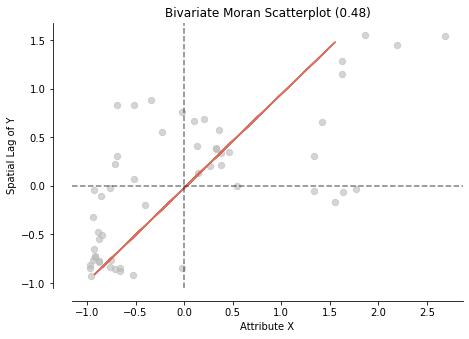

In [10]:
# code for display
moran_bv = Moran_BV(y_val, x_val, w)
moran_scatterplot(moran_bv)

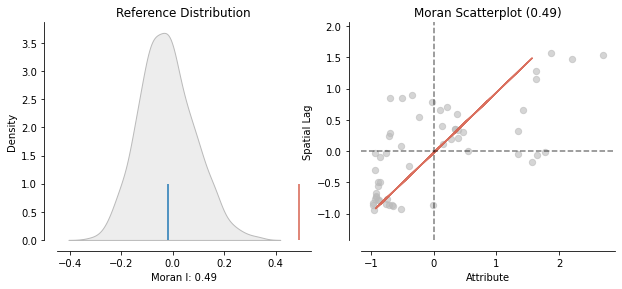

In [11]:
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
from esda.moran import Moran
moran = Moran(y_val,w)
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [12]:
# huge spatial dependency we reject the null hypothesis 
print( "P-value of moran Bi-variate on a yearly basis: " + str(moran_bv.p_sim))
print( "P-value of Moran statistics of a single variable: "+ str(moran.p_z_sim))

P-value of moran Bi-variate on a yearly basis: 0.001
P-value of Moran statistics of a single variable: 7.97990534873172e-07


In [13]:
from IPython.display import clear_output
columns_df = imputated_df.drop(['puma_id','puma','mergeid', 'year', 'geometry'], axis = 1).columns
lst_cols = {'variable': [], 'year': [], 'Moran P-value': []}

for yr in range(2011, 2018):
    inner_percent = 0
    for cols in columns_df: 
        observation = imputated_df[imputated_df['year'] == yr][['puma_id',cols,'geometry']]
        w = ps.lib.weights.Queen.from_dataframe(observation, idVariable='puma_id')
        y_val = observation[cols]
        moran = Moran(y_val,w)
        lst_cols['variable'].append(cols)
        lst_cols['year'].append(yr)
        lst_cols['Moran P-value'].append(moran.p_z_sim)
        inner_percent += 1 
        print(inner_percent/ len(columns_df) * 100)
        clear_output(wait=True)

('WARNING: ', '4114', ' is an island (no neighbors)')
100.0


C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\pysal\lib\weights\contiguity.py:185: UserWarning: There is one disconnected observation (no neighbors).
Island id: 4114
  W.__init__(self, neighbors, ids=ids, **kw)


In [14]:
import plotly.express as px
dat = pd.DataFrame(lst_cols)
fig = px.line(dat, x="year", y="Moran P-value", color = "variable",title='P-values generated by Moran Statistics per given variable and year')
fig.add_hline(y=0.05, line_width=3, line_dash="dash", line_color="green", annotation_text = "Rejection Region")
fig.show()

In [15]:
dat[dat['Moran P-value'] > .05] # variables that we will be adding 0 weights on the spatial model 

variable  year  Moran P-value
1         estimate_total_pop  2011       0.229521
26   percent_american_indian  2011       0.131760
28          percent_hawaiian  2011       0.321946
42        estimate_total_pop  2012       0.258339
67   percent_american_indian  2012       0.059868
69          percent_hawaiian  2012       0.220117
83        estimate_total_pop  2013       0.270787
95       percent_no_plumbing  2013       0.068479
96        percent_no_kitchen  2013       0.074614
110         percent_hawaiian  2013       0.214858
124       estimate_total_pop  2014       0.276223
137       percent_no_kitchen  2014       0.171942
151         percent_hawaiian  2014       0.353209
165       estimate_total_pop  2015       0.266489
192         percent_hawaiian  2015       0.313299
206       estimate_total_pop  2016       0.242430
211  percent_second_mortgage  2016       0.193370
233         percent_hawaiian  2016       0.271647
247       estimate_total_pop  2017       0.260557
252  percent_second_mortgage  2017       0.498078
274         percent_hawaiian  2017       0.428696

**4.3 Method 3**

#### operation name: Heat map of variables
#### Reason for doing this: here we see that our independent variables are vastly correlated with one another. This is problematic as our model may experience multicollinearity. Furthermore, if the correlations are severe, then the interpretability of the model would become useless.
#### Outcome: the outcome suggests that our independent variables are correlated with one another. We may see a sever variance inflations factors in our variables. Furthermore, using these variables, we may not be able to infer a exact causation since in this case other variables are dependent to one another. 

In [16]:
# code for operation
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,11.27)})
corr_df = imputated_df.drop(['puma_id','puma','mergeid', 'year'], axis = 1)
corr = corr_df.corr()

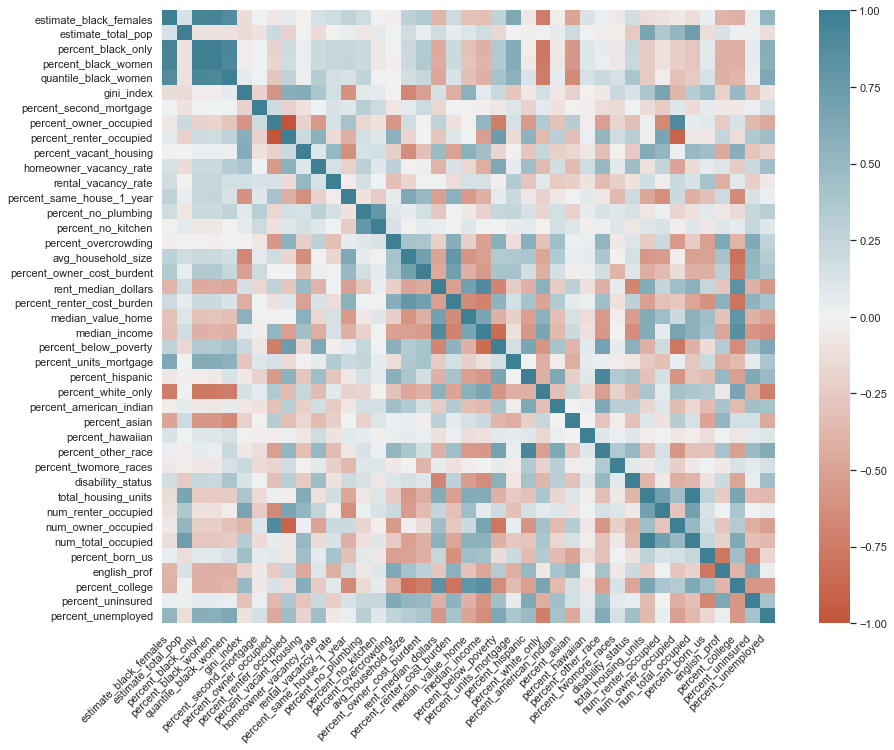

In [17]:
# code for display
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**4.4 Method 4**

#### operation name: PCA analysis 
#### Reason for doing this: we may be able to do dimensionality reductions and find the optimal principal components that explaines much of the variability of the data set. As seen from previous EDA (HEAT MAP), the correlations of each independent variable means that we may be violating multicollinearity. Such multicollinearity will then ruin any inference or predictions we may have in our model. 
#### Outcome: From the results of this EDA, we found that the optimal principal components that may explain variability is 16

In [18]:
# please run this 
# !pip install pca 

In [19]:
# code for operation
from pca import pca
from sklearn import preprocessing
df2 = imputated_df.drop(['puma_id','puma','mergeid', 'year','geometry'], axis = 1).copy()

model = pca()
# Fit transform

out = model.fit_transform(pd.DataFrame(preprocessing.StandardScaler().fit_transform(df2), columns =  df2.columns))

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [41] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [16] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


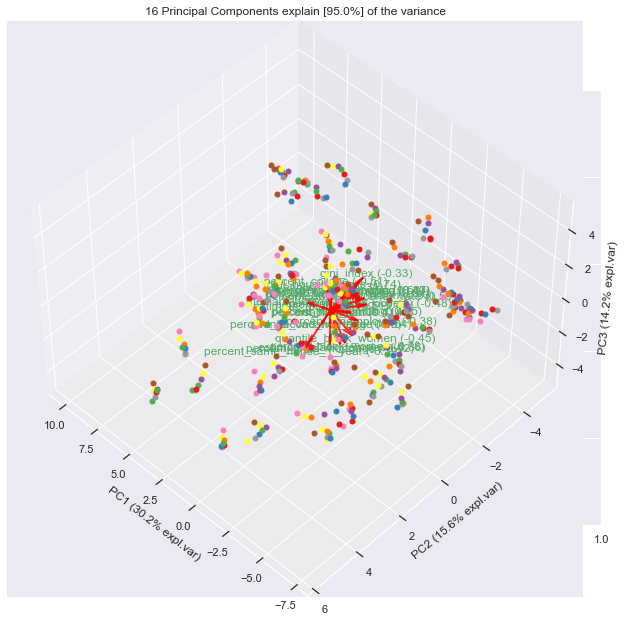

(<Figure size 720x576 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1d4cb143948>)

In [20]:
model.biplot3d(legend = False)

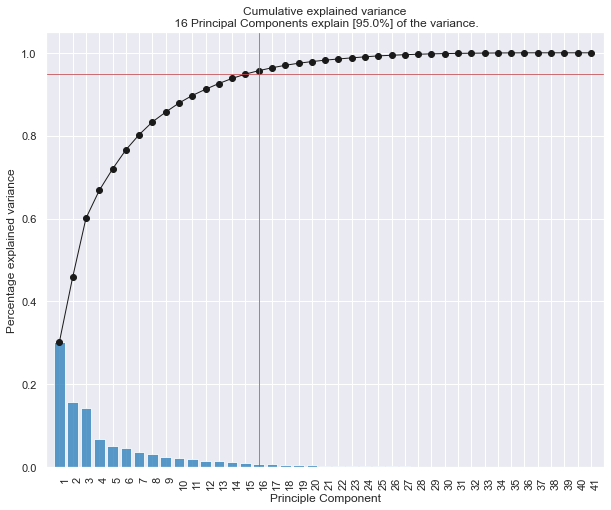

      PC                     feature   loading  type
0    PC1               median_income  0.261053  best
1    PC2                  gini_index -0.330497  best
2    PC3                english_prof  0.342393  best
3    PC4          estimate_total_pop  0.510654  best
4    PC5         percent_no_plumbing  0.545439  best
5    PC6       percent_twomore_races  0.535911  best
6    PC7           disability_status  0.404871  best
7    PC8            percent_hawaiian  0.409388  best
8    PC9            percent_hawaiian  0.829627  best
9   PC10     percent_second_mortgage -0.542407  best
10  PC11     percent_second_mortgage -0.481414  best
11  PC12       percent_twomore_races  0.495000  best
12  PC13     percent_american_indian  0.628451  best
13  PC14      homeowner_vacancy_rate  0.589841  best
14  PC15        percent_overcrowding  0.395961  best
15  PC16     percent_american_indian  0.440206  best
16  PC17      percent_vacant_housing  0.368388  best
17  PC18      percent_units_mortgage -0.421107

<Figure size 1130.4x811.44 with 0 Axes>

In [21]:
model.plot()
print(out['topfeat'])

**4.5 Method 5**

#### operation name: Developing New Features
#### Reason for doing this: To get the most imperative element feature in our process to prove the relationship between migration of races, while considering general income and fluctuation in housing/rent per year by puma in New York City.
#### Outcome: the new feature of rent as a percentage of income can better reflect for leaving their curent residency as it does account for both rent and income change

In [22]:
# code for operation
import pandas as pd 
from collections import Counter
from statistics import mean 
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd 
file = imputated_df.copy()
years = list(Counter(file['year']).keys())
dataDict = {}
yearZipGR = {}
yearZipGr = {}
df = {}
rentMedDlr = file['rent_median_dollars']
medInc = file['median_income']
    
shortestCol = min(len(rentMedDlr),len(medInc))

newFeatureList = [0] * shortestCol

for i in range(shortestCol):
    x = rentMedDlr[i] 
    y = medInc[i]
    if x>0 and y>0:
        newFeatureList[i] = (x/y) * 100
file = pd.concat([file,pd.Series(newFeatureList, name = 'rent_as_percentage_of_income')], axis= 1)

In [23]:
# code for display
file

puma  year         mergeid  estimate_black_females  \
0    3603701  2011  3603701 _ 2011                    8349   
1    3603702  2011  3603702 _ 2011                   56929   
2    3603703  2011  3603703 _ 2011                   17630   
3    3603704  2011  3603704 _ 2011                   15386   
4    3603705  2011  3603705 _ 2011                   30973   
..       ...   ...             ...                     ...   
380  3604110  2017  3604110 _ 2017                    1531   
381  3604111  2017  3604111 _ 2017                    5266   
382  3604112  2017  3604112 _ 2017                   84438   
383  3604113  2017  3604113 _ 2017                   11475   
384  3604114  2017  3604114 _ 2017                   26490   

     estimate_total_pop  percent_black_only  percent_black_women  \
0                106558                14.3             7.835170   
1                144403                70.4            39.423696   
2                115784                27.2            15.226629   
3                125976                23.0            12.213437   
4                154386                36.4            20.062052   
..                  ...                 ...                  ...   
380              181598                 1.8             0.843071   
381              155032                 6.3             3.396718   
382              244302                63.2            34.562959   
383              138868                15.8             8.263243   
384              123012                37.6            21.534484   

     quantile_black_women  gini_index  percent_second_mortgage  ...  \
0                       3      0.4852                14.000000  ...   
1                       5      0.4291                14.900000  ...   
2                       4      0.4293                13.600000  ...   
3                       3      0.4500                19.000000  ...   
4                       4      0.4847                12.100000  ...   
..                    ...         ...                      ...  ...   
380                     1      0.4319                 9.787541  ...   
381                     2      0.4262                 8.285055  ...   
382                     5      0.4276                 9.560914  ...   
383                     3      0.4412                 7.386304  ...   
384                     4      0.4975                 7.149818  ...   

     num_owner_occupied  num_total_occupied  percent_born_us  english_prof  \
0                 12714               41471             62.3          20.3   
1                 17780               47458             56.1           7.7   
2                 22537               45970             76.3          10.2   
3                 13398               44469             58.9          21.2   
4                  3850               51087             60.8          28.5   
..                  ...                 ...              ...           ...   
380               26353               61779             57.4          23.4   
381               20760               44754             45.7          26.6   
382               34880               71287             55.4          14.3   
383               25992               39359             51.5          13.3   
384               15239               41056             70.6          12.6   

     percent_college  percent_uninsured  percent_unemployed  puma_id  \
0               38.7          11.983000                 6.3     3701   
1               22.1          14.353333                 8.5     3702   
2               24.2           9.534667                 5.5     3703   
3               23.2          13.788667                 6.4     3704   
4                9.7          15.490667                 8.4     3705   
..               ...                ...                 ...      ...   
380             27.5          12.000000                 3.8     4110   
381             26.2          12.600000                 4.7     4111   
382     

**4.6 Method 6**

#### operation name: variance inflation factor analysis 
#### Reason for doing this: As seen from our results from the HeatMap EDA, we saw that other variables are dependent to one another. As a result, the team conducted VIF analysis. 
#### Outcome: the results shows that indeed, the VIF of our variables exceed the threshold of 10 which calls for a severe case of multicollinearity. As such, we decided to use the results from the PCA analysis and use 16 principal components that will help us to be able to reduce dimensionality. We hope to use this reduced dimension and the original data set in our model to see which one will give us the best predictions. 

In [24]:
# code for operation
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns 
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
calc_vif(df2) # we see that we violated multicollinearity since we have variance inflation factors greater than 10 

variables           VIF
0       estimate_black_females  5.561620e+01
1           estimate_total_pop  1.614038e+02
2           percent_black_only  1.130493e+05
3          percent_black_women  1.212804e+03
4         quantile_black_women  1.836753e+01
5                   gini_index  1.749665e+01
6      percent_second_mortgage  1.948009e+00
7       percent_owner_occupied  2.463281e+05
8      percent_renter_occupied  9.074490e+05
9       percent_vacant_housing  4.448688e+01
10      homeowner_vacancy_rate  3.528286e+00
11         rental_vacancy_rate  3.539700e+00
12   percent_same_house_1_year  1.081352e+01
13         percent_no_plumbing  6.220955e+00
14          percent_no_kitchen  5.357053e+00
15        percent_overcrowding  8.144666e+00
16          avg_household_size  7.024789e+01
17  percent_owner_cost_burdent  1.146719e+01
18         rent_median_dollars  3.754729e+01
19  percent_renter_cost_burden  1.653663e+01
20           median_value_home  1.841461e+01
21               median_income  1.106372e+02
22       percent_below_poverty  2.983506e+01
23      percent_units_mortgage  4.617553e+00
24            percent_hispanic  3.285754e+01
25          percent_white_only  1.037603e+05
26     percent_american_indian  9.620343e+00
27               percent_asian  2.615000e+04
28            percent_hawaiian  1.537464e+00
29          percent_other_race  3.512413e+04
30       percent_twomore_races  4.273454e+02
31           disability_status  7.053934e+00
32         total_housing_units  3.190317e+03
33         num_renter_occupied           inf
34          num_owner_occupied           inf
35          num_total_occupied           inf
36             percent_born_us  1.562164e+01
37                english_prof  3.161884e+01
38             percent_college  5.174437e+01
39           percent_uninsured  9.304976e+00
40          percent_unemployed  5.799729e+00

In [25]:
from sklearn.decomposition import PCA 
PCA_model  = PCA(n_components =  16 ) # chosen from the PCA analysis conducted above 
dimensionality_reduction =  PCA_model.fit_transform(pd.DataFrame(preprocessing.StandardScaler().fit_transform(df2), columns =  df2.columns))

In [26]:
# code for display
calc_vif(pd.DataFrame(dimensionality_reduction)) # we were able to avoid multicollinearity by using PCA 

variables  VIF
0           0  1.0
1           1  1.0
2           2  1.0
3           3  1.0
4           4  1.0
5           5  1.0
6           6  1.0
7           7  1.0
8           8  1.0
9           9  1.0
10         10  1.0
11         11  1.0
12         12  1.0
13         13  1.0
14         14  1.0
15         15  1.0

# what this means is that to avoid multicollinearity, we can use PCA with 16 components as the maximum variability explained

**4.7 Method 7**

#### operation name: PUMA's rent as percentage of income by year
#### Reason for doing this: In order to successfully measure of gentrication or the risk of gentrification we need to define a feature that dictates the reason for such migrations, usually this is caused by rent increased or income being static over years as inflation stimulates the rent cost to increase 
#### Outcome: the percentage movement from 2011 - 2017 by puma, this representation of affordability - as percent is low it is affordable and percent increase it is less affordable, this prepares us to see which PUMA is affordable and the race ratio in that PUMA 

In [27]:
# code for operation
years = list(Counter(file['year']).keys())
puma = list(Counter(file['puma']).keys())

for year in years[:]:
    yearZipGr[year] = {} 
    file1 = file[file['year'] == year]
    for p in puma:        
        yearZipGr[year][p] = mean(list(file1[file1['puma'] == p]['rent_as_percentage_of_income']))

df = {}
df['year'] = list(yearZipGr.keys())

for p in puma:
    df[p] = []
    for year in yearZipGr:
        df[p].append(yearZipGr[year][p])
            
df = pd.DataFrame(data = df)
df

year   3603701   3603702   3603703   3603704   3603705   3603706   3603707  \
0  2011  2.056317  2.295054  1.916790  2.305003  3.774696  3.343485  3.620906   
1  2012  2.105723  2.410967  1.957309  2.397697  3.987773  3.499366  3.840050   
2  2013  2.166209  2.440788  2.007807  2.432595  3.996387  3.543800  3.949219   
3  2014  2.163466  2.558347  2.019632  2.509507  4.089555  3.604861  4.189303   
4  2015  2.128793  2.593597  2.017921  2.574236  4.065041  3.573759  4.382371   
5  2016  2.203428  2.578019  1.995515  2.560067  3.935049  3.562263  4.452447   
6  2017  2.218969  2.511578  1.978243  2.557816  3.905121  3.559497  4.217959   

    3603708   3603709  ...   3604105   3604106   3604107   3604108   3604109  \
0  3.505911  2.573374  ...  1.742035  2.127064  2.827046  2.040042  2.343793   
1  3.571298  2.626173  ...  1.791910  2.170324  2.922085  2.085426  2.471094   
2  3.732607  2.854730  ...  1.837909  2.221499  2.946266  2.167187  2.465040   
3  3.950814  2.901139  ...  1.865840  2.239210  2.992394  2.300732  2.539100   
4  4.028409  2.978513  ...  1.889236  2.229336  3.023986  2.227345  2.600668   
5  3.973876  3.032382  ...  1.882431  2.235198  3.104870  2.224984  2.541809   
6  3.951756  3.016444  ...  1.865685  2.303015  3.055172  2.257442  2.515595   

    3604110   3604111   3604112   3604113   3604114  
0  2.218115  2.244617  2.056071  2.069089  1.958689  
1  2.263771  2.251646  2.112240  2.142799  2.024039  
2  2.304364  2.209491  2.162698  2.136924  2.000967  
3  2.267987  2.227706  2.226751  2.200068  2.113675  
4  2.228982  2.277747  2.219952  2.189980  2.138885  
5  2.164681  2.281296  2.215459  2.149205  2.161736  
6  2.078363  2.233277  2.142430  2.107627  2.189311  

[7 rows x 56 columns]

In [28]:
# code for display
fig = px.line(df, x='year', y = puma)
fig.show()

## what we see here is that we were able to make a new feature that seems to have a negative correlation with median value home. This is really interesting!  

<AxesSubplot:xlabel='median_income', ylabel='median_value_home'>

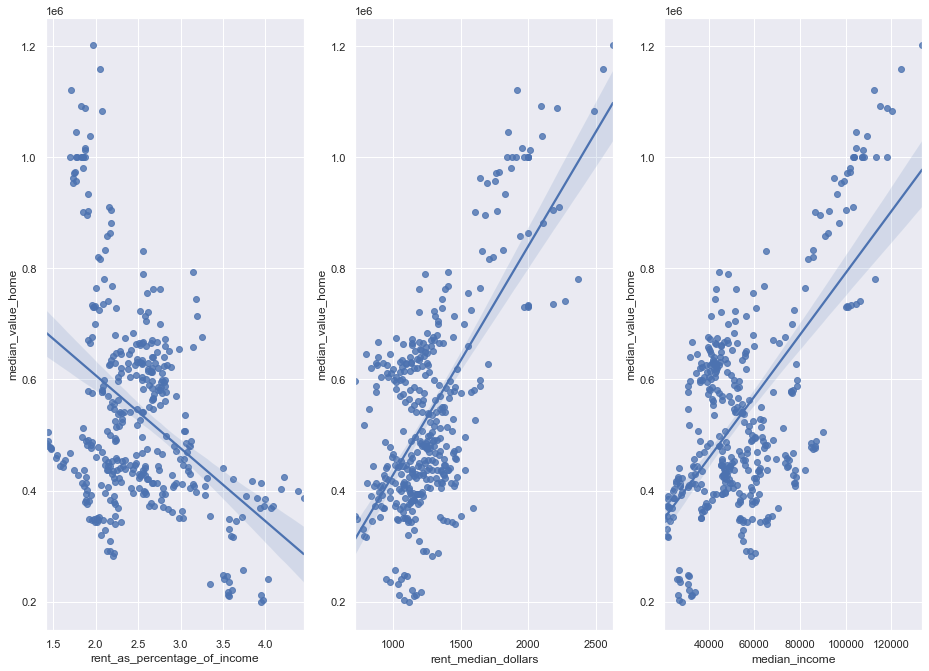

In [29]:
f, axes = plt.subplots(1, 3)

sns.regplot(x='rent_as_percentage_of_income', y='median_value_home', data=file,ax=axes[0]) # overall plot 
sns.regplot(x='rent_median_dollars', y='median_value_home', data=file,ax=axes[1]) 
sns.regplot(x='median_income', y='median_value_home', data=file,ax=axes[2]) 

**4.8 Method 8**

#### operation name:Defining standard for gentrification
#### Reason for doing this: As we all know gentrification is when a side effect occurs due to the impact of land and property development in that neighborhood, the rent of home value will rise along with the property tax, therefore many people leave their home, however most of the home mirgrants tends to be racial minorities causing racial enclaves. We here define what minorities are, how diversity should be standardized, and what to consider as not impacted by gentrification.
#### Outcome:  As the percentage of white population Increase it corresponds to a higher median home value in a puma, this implies that the puma with the highest home value is also the least diverse comparatively and all the puma with a high diversity ratio meaning lower white percentage has a poorer median value homes.

In [30]:
# code for operation
for year in years[:]:
    yearZipGr[year] = file[file['year'] == year]

In [31]:
# code for display
from sklearn.linear_model import LinearRegression 
for y in yearZipGr:
    print(y)
 
   
    fig = go.Figure(data=go.Scattergl(
        x = yearZipGr[y]['percent_white_only'],
        y = yearZipGr[y]['median_value_home'],
        mode='markers',
        marker=dict(
            colorscale='Viridis',
            line_width=1
        )
    ))
    fig.show()

2011


2012


2013


2014


2015


2016


2017


<AxesSubplot:xlabel='percent_white_only', ylabel='median_value_home'>

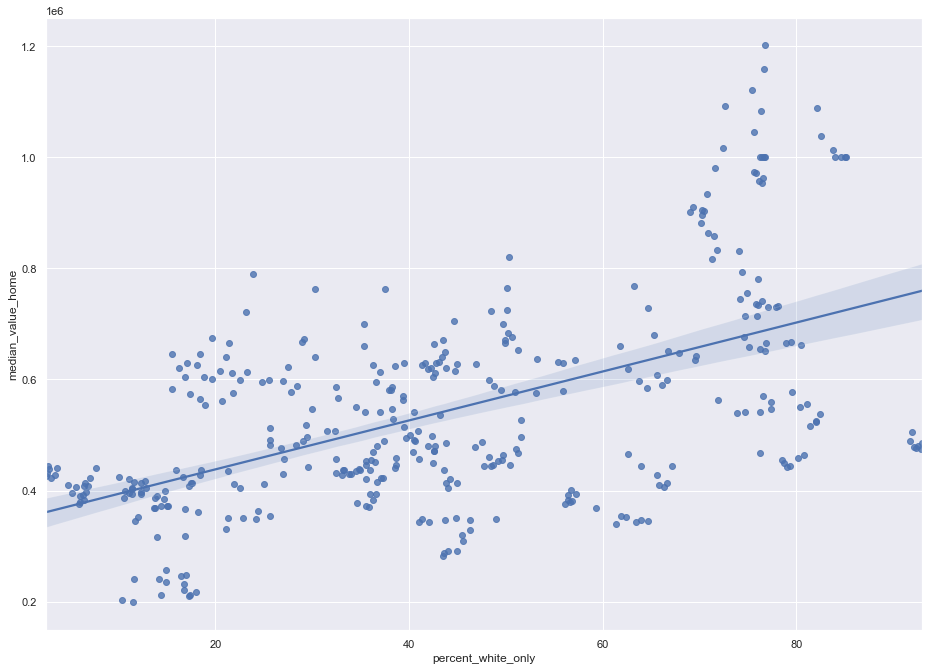

In [32]:
sns.regplot(x='percent_white_only', y='median_value_home', data=file) # overall plot 

## From this graph, we may be able to use the variable "percent_white_only" to suspect this race as individual gentrifiers. 

**4.9 Method 9**

#### operation name: Analyzing rent growth
#### Reason for doing this: This is a crucial part of our process to predict which areas will have a higher chances of gentrifying, this shows the growth of rent from all pumas from 2011-2017, therefore we can compare it to the change in race from that period to define which races is the least effect in gentrification. in order ro get the best comparison we will graph out the rent growth and take the period with the biggest fluctuations and compare it to the race ratio change.
#### Outcome: The biggest fluctuation of rent growth is in 2013 to 2016 therefore these values would weigh more than others.

In [33]:
# code for operation

years = list(Counter(file['year']).keys())
puma = list(Counter(file['puma']).keys())

for year in years[:]:
    yearZipGr[year] = {} 
    file1 = file[file['year'] == year]
    for p in puma:        
        yearZipGr[year][p] = mean(list(file1[file1['puma'] == p]['rent_median_dollars']))

df = {}
df['year'] = list(yearZipGr.keys())

for p in puma:
    df[p] = []
    for year in yearZipGr:
        df[p].append(yearZipGr[year][p])
            
df = pd.DataFrame(data = df)
df

year  3603701  3603702  3603703  3603704  3603705  3603706  3603707  \
0  2011     1110     1077     1026     1055      833     1032      954   
1  2012     1156     1115     1038     1091      861     1077      992   
2  2013     1192     1148     1075     1135      885     1104     1011   
3  2014     1220     1174     1109     1168      906     1136     1041   
4  2015     1239     1186     1108     1192      920     1150     1059   
5  2016     1287     1216     1130     1220      933     1166     1088   
6  2017     1334     1269     1162     1252      973     1204     1117   

   3603708  3603709  ...  3604105  3604106  3604107  3604108  3604109  \
0      946      975  ...     1356     1215     1256     1345     1284   
1      979     1010  ...     1379     1275     1301     1370     1340   
2     1014     1048  ...     1428     1297     1345     1401     1382   
3     1041     1072  ...     1450     1324     1373     1434     1440   
4     1055     1084  ...     1459     1344     1378     1459     1479   
5     1077     1105  ...     1474     1401     1393     1504     1529   
6     1114     1141  ...     1531     1443     1437     1591     1609   

   3604110  3604111  3604112  3604113  3604114  
0     1212     1254     1081     1268      935  
1     1258     1289     1125     1310      975  
2     1273     1319     1157     1325      993  
3     1305     1354     1180     1355     1013  
4     1319     1382     1195     1366     1050  
5     1361     1422     1223     1405     1069  
6     1420     1459     1253     1464     1122  

[7 rows x 56 columns]

In [34]:
# code for display
fig = px.line(df, x='year', y= puma)
fig.show()

In [35]:
from scipy.stats import f_oneway
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
race_cols = ['percent_black_only','percent_hispanic','percent_white_only','percent_american_indian','percent_asian'
            ,'percent_hawaiian','percent_other_race','percent_twomore_races','rent_median_dollars']


x = file[race_cols].drop('rent_median_dollars', axis =1)
y = file['rent_median_dollars']

model = Ridge(alpha=1e-2).fit(x, y)
model.score(x, y)

0.4304593830256993

In [36]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, x, y,
                          n_repeats=30,
                         random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{x.columns[i]:<8}"
            f"   {r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

percent_black_only   10.522 +/- 0.491
percent_white_only   5.899 +/- 0.269
percent_other_race   2.544 +/- 0.140
percent_asian   1.951 +/- 0.113
percent_hispanic   0.352 +/- 0.036
percent_twomore_races   0.025 +/- 0.011


# we see that african americans and caucasians are good predictors of rent price. This is important as we see that from moran statistics as well they tend to cluster. Moreover, such variability among the two means that gentrification is feasible to predict in terms of identifying the pressures that causes BIPOC to be pressured by outside factors. 

**4.10 Method 10**

#### operation name: scatter ternary of race 
#### Reason for doing this: we need to display the relationships between the three major race alone side of rent values, therefore we can derive a correlation and make predictions based on the characteristics of the races migration, in other words why does a certain race attracts to a certain level of rent
#### Outcome: As we get closer to the center of the graph we are having the most diversity, correspondingly the most diverse regions are also the regions with the lowest rent and the highest below poverty rate, this is our preview by puma of diversity, rent and poverty- it is also the first insight on displaying gentrification.


In [37]:
df_triangulate = pd.melt(file[['puma','percent_below_poverty','rent_median_dollars','percent_white_only','percent_black_only','percent_hispanic']], id_vars = ['percent_white_only','percent_below_poverty','percent_hispanic','puma','percent_black_only'])

In [38]:
df_triangulate = df_triangulate.rename(columns = {'value':'rent median dollars value'})


In [39]:
df = px.data.election()
fig = px.scatter_ternary(df_triangulate, a='percent_black_only', b='percent_white_only', c='percent_hispanic', 
    color='rent median dollars value', size='percent_below_poverty', size_max=20,title = 'race that are suscetible to be displaced due to being poor')



fig.show()

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline
    5 – with 0-3 valid and non-repeating EDA operations;
    10 – with 4-8 valid and non-repeating EDA operations;
    15 – with 9 valid and non-repeating EDA operations;
    20 - with 10 valid and non-repeating EDA operations;
    25 - Completely master EDA and every step is perfect;
    
Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
